# The Goal

1) The goal is to predict the burned area of forest fires, in the northeast region of Portugal using temperature, relative humidty, wind, and rain data. 

2) The goal is to predict the burned area of forest fires, in the northeast region of Portugal using FFMC, DMC, DC, and ISI indices. From the Fire Weather Index (FWI)

# Introduction

Forest fires are a huge environmental issue that affects thousands of people every year. One way we can help diminish the damage is fast detection so that the fires can be controlled in a speedy manner. For this problem, we will use local sensors provided by meteorological stations. It is known that meteorological conditions such as wind, humidity, and temperature influence forest fires and their rate of speed. 
We will use different machine learning models to predict the burned area of forest fires. Starting off with a simple linear regression, we move on to decision trees and random forest models. In the end we compare the three and choose the best performing. 

# Setup

In [417]:
# Common imports
import numpy as np
import pandas as pd

# Scikit-Learn
import sklearn

# To plot data
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Get the data

In [418]:
# Data is in the project folder
forest_fires = pd.read_csv('forestfires.csv')

forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### 1. X : x-axis spatial coordinate within Montesinho park map
#### 2. Y : y-axis spatial coordinate within Montesinho park map
#### 3. month : month ofthe year: "jan" to "dec"
#### 4. day : day of the week: "mon" to "sun"
#### 5. FFMC : FFMC index from the FWI system
#### 6. DMC : DMC index from the FWI system
#### 7. ISI : ISI index from the FWI system
#### !8. temp : temperature in Celsius degrees
#### !9. RH : relative humidity in %
#### !10. wind : wind speen in km/h
#### !11. rain : outside rain in mm/m2
#### 12. area : the burned area of the forest (in ha(hectare))

In [419]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [420]:
forest_fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<function matplotlib.pyplot.show(*args, **kw)>

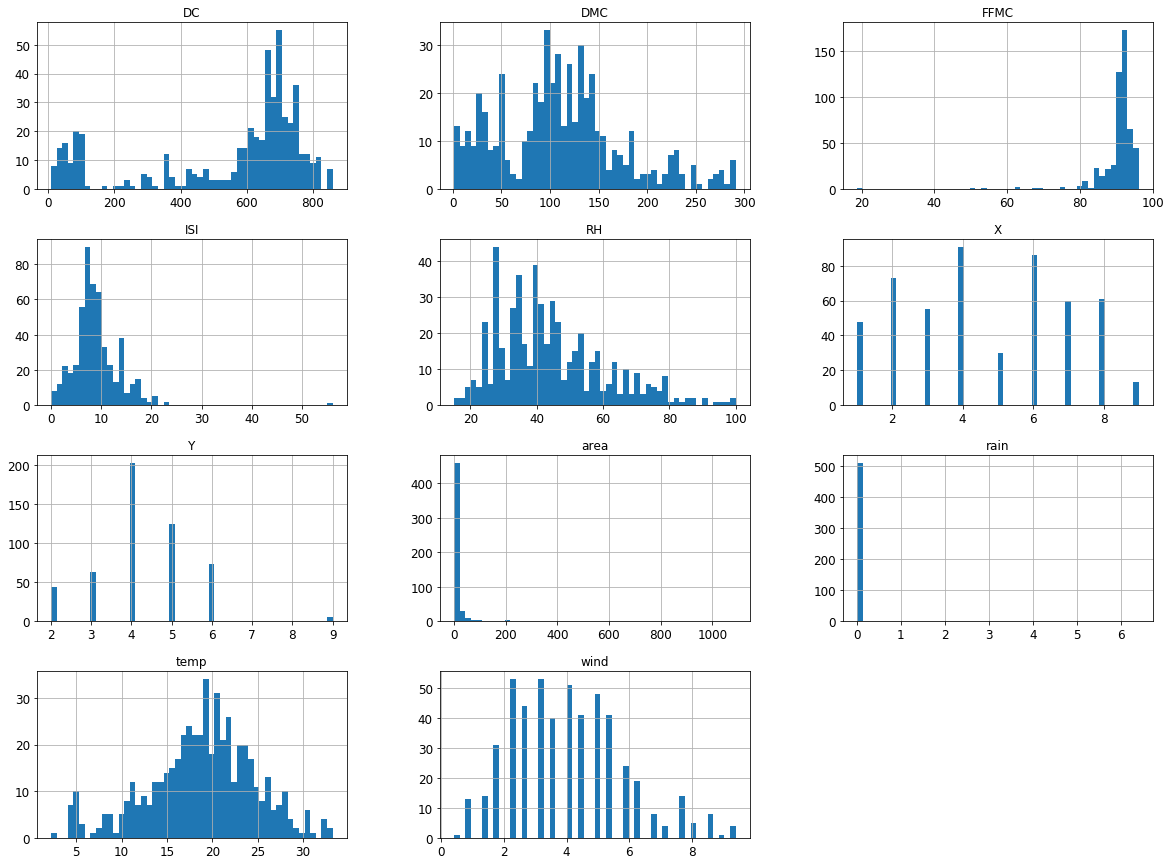

In [421]:
%matplotlib inline
forest_fires.hist(bins=50, figsize=(20,15))
plt.show

# Visualize the data

## Histograph of Area and Area Log

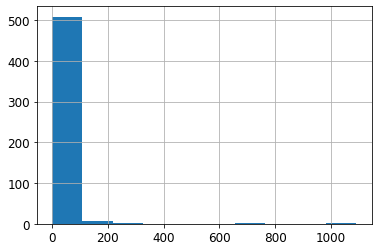

In [422]:
forest_fires["area"].hist()

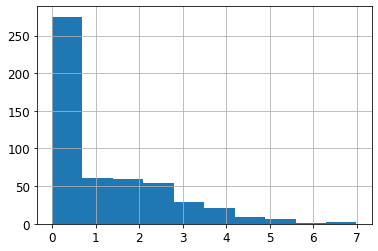

In [423]:
# Used to reduce skewness and improve symmetry. Improves regression results for right-skewed targets. 
areaLog = np.log(forest_fires['area'] + 1)
areaLog.hist()

In [424]:
# Add the log area to the dataset 
forest_fires['areaLog'] = areaLog

## Scatter Plot of Humidity vs Area Log

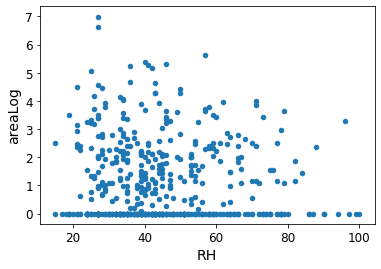

In [425]:
forest_fires.plot(kind="scatter", x="RH", y="areaLog")

## Scatter Plot of Wind vs Area Log

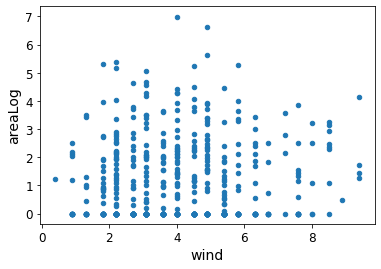

In [426]:
forest_fires.plot(kind="scatter", x="wind", y="areaLog")

## Scatter Plot of Temperature vs Area Log

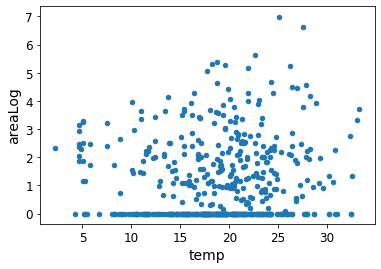

In [427]:
forest_fires.plot(kind="scatter", x="temp", y="areaLog")

## Scatter Plot of Rain vs Area Log

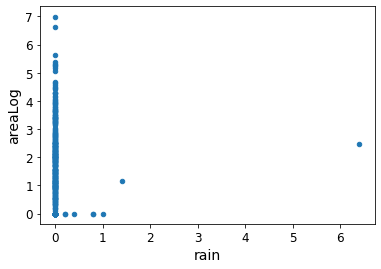

In [428]:
forest_fires.plot(kind="scatter", x="rain", y="areaLog")

## Scatter Plot of FFMC Index vs Area Log

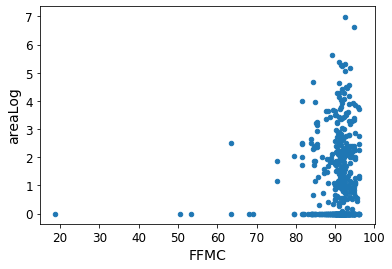

In [429]:
forest_fires.plot(kind="scatter", x="FFMC", y="areaLog")

## Scatter Plot of DMC Index vs Area Log

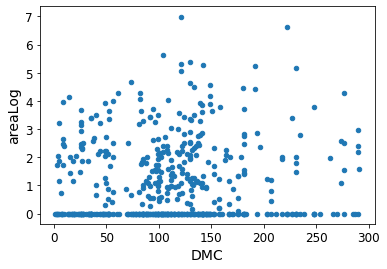

In [430]:
forest_fires.plot(kind="scatter", x="DMC", y="areaLog")

## Scatter Plot of DC Index vs Area Log

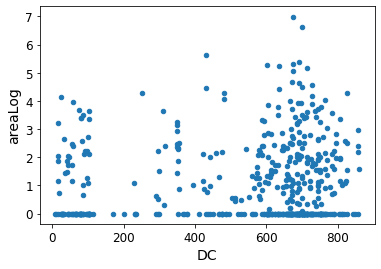

In [431]:
forest_fires.plot(kind="scatter", x="DC", y="areaLog")

## Scatter Plot of ISI Index vs Area Log

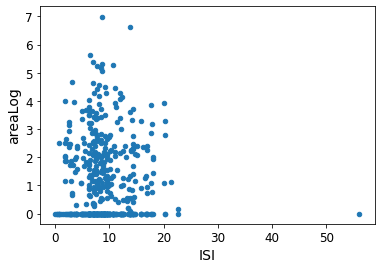

In [432]:
forest_fires.plot(kind="scatter", x="ISI", y="areaLog")

# 1. Using only temperature, relative humidity, wind, and rain to predict burning area

MultiRegression - Linear or Logrithmic or Decision Trees?

## Creating a Training and Testing Set (80%/20% of data)

In [433]:
# Using only meteorological data
forest_fires_meteoro = forest_fires.drop(['X', 'Y', 'month', 'day', 'area', 'FFMC', 'DMC', 'DC', 'ISI'], axis=1)

In [434]:
np.random.seed(25)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [435]:
train_set, test_set = split_train_test(forest_fires_meteoro, 0.20)
print("Train Set Size: " + str(len(train_set)))
print("Test Set Size: " + str(len(test_set)))

Train Set Size: 414
Test Set Size: 103


In [436]:
print(train_set.shape, test_set.shape)

(414, 5) (103, 5)


In [437]:
train_set.head()

,temp,RH,wind,rain,areaLog
236,18.2,46,1.8,0.0,5.307971
250,26.8,25,3.1,0.0,0.518794
48,11.8,35,1.8,0.0,0.000000
417,13.8,24,5.8,0.0,0.000000
140,21.9,39,1.8,0.0,0.385262


In [438]:
test_set.head()

,temp,RH,wind,rain,areaLog
514,21.2,70,6.7,0.0,2.498152
254,18.9,41,3.1,0.0,2.428336
308,16.0,45,1.8,0.0,0.000000
252,22.1,37,3.6,0.0,0.190620
440,16.2,58,3.6,0.0,0.000000


In [439]:
X_train = train_set.iloc[:, :-1] # First column to second last column
Y_train = train_set.iloc[:, 4] # Last column: areaLog

X_test = test_set.iloc[:, :-1]
Y_test = test_set.iloc[:, 4]

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(414, 4) (103, 4) (414,) (103,)


## Start with a Simple Linear Regression:

In [440]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [441]:
# An evaluation of the model
def evaluate(model, features, label):
    predictions = model.predict(features)
    errors = abs(predictions - label)
    #accuracy = 100 * (model.score(features, label))
    rmse = np.sqrt(mean_squared_error(label, predictions))
    print("Model Performance")
    print('Average Error: {:0.4f} Hectare Logged.'.format(np.mean(errors)))
    #print('Accuracy: {:0.2f}%.'.format(accuracy))
    print('Root Mean Squared Error: {:0.4f}.'.format(rmse))

    return rmse

## Linear Regression on the Training Set

In [442]:
linear_regression_accuracy = evaluate(linear_reg, X_train, Y_train)

Model Performance
Average Error: 1.1285 Hectare Logged.
Root Mean Squared Error: 1.3636.


## Linear Regression on the Testing Set Based Off the Training Set Model

In [443]:
# Now we use the testing set
linear_regression_test_accuracy = evaluate(linear_reg, X_test, Y_test)

Model Performance
Average Error: 1.2170 Hectare Logged.
Root Mean Squared Error: 1.4952.


From the Root Mean Squared Error and the Accuracy, we can see that Linear Regression is not the best model to use for this problem.

## Let's Try a Decision Tree Model:

Decision Tree Models are good for finding complex nonlinear relationships in the data.

In [444]:
from sklearn.tree import DecisionTreeRegressor

tree_regr = DecisionTreeRegressor()
tree_regr.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## Decision Tree on the Training Set

In [445]:
decision_tree_accuracy = evaluate(tree_regr, X_train, Y_train)

Model Performance
Average Error: 0.0750 Hectare Logged.
Root Mean Squared Error: 0.3177.


This seems to perform a lot better than Linear Regression at this point, but it could be that the Decission Tree is overfitting the data. To see if this is true, we will use Cross-Validation.

In [446]:
from sklearn.model_selection import cross_val_score

# Theres is no rmse scoring for corss_val_score so we will manually transfrom scores into rmse scores.
scores = cross_val_score(tree_regr, X_train, Y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    
display_scores(tree_rmse_scores)

scores: [1.99405219 1.31668731 1.80342695 2.0809821  1.74377038 1.94161394
 1.5487538  1.81074182 2.18863588 1.67656776]
Mean: 1.8105232135290532
Standard Deviation: 0.24532272657529222


It seems that the Decission Tree is indeed overfitting and is a worse model choice than Linear Regression!

## Decision Tree on the Testing Set Based Off the Training Set Model

In [447]:
decision_tree_accuracy_test = evaluate(tree_regr, X_test, Y_test)

Model Performance
Average Error: 1.4474 Hectare Logged.
Root Mean Squared Error: 1.9753.


This confirms our suspisons that the Decission Tree is overfitting the data and actually performs worse than our Linear Regression model! 

## Let's Try a Random Forest Model:

In [448]:
# Will attempt to fine tune hyperparameters using Random Hyperpareamter Grid and Grid Search CV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6], 'bootstrap': [True, False]}


In [449]:
from sklearn.ensemble import RandomForestRegressor

forest_regr = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = forest_regr, param_distributions = random_grid, n_iter = 100, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
#forest_regr.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   46.6s finished
C:\Users\Willy\AppData\Local\Alteryx\bin\Miniconda3\envs\TextMiningTools_venv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [450]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 15,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

## Random Forest Model on the Training Set

In [451]:
random_forest_accuracy = evaluate(rf_random, X_train, Y_train)

Model Performance
Average Error: 0.9513 Hectare Logged.
Root Mean Squared Error: 1.1728.


In [452]:
scores = cross_val_score(forest_regr, X_train, Y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

scores: [1.88282731 1.30301159 1.41875788 1.52884488 1.41903025 1.39214967
 1.62882295 1.37563515 1.73980081 1.41503549]
Mean: 1.5103915985654832
Standard Deviation: 0.17512475382535128


C:\Users\Willy\AppData\Local\Alteryx\bin\Miniconda3\envs\TextMiningTools_venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Willy\AppData\Local\Alteryx\bin\Miniconda3\envs\TextMiningTools_venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Willy\AppData\Local\Alteryx\bin\Miniconda3\envs\TextMiningTools_venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Willy\AppData\Local\Alteryx\bin\Miniconda3\envs\TextMiningTools_venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The d

## Random Forest on the Testing Set Based Off the Training Set Model

In [453]:
random_forest_accuracy_test = evaluate(rf_random, X_test, Y_test)

Model Performance
Average Error: 1.2101 Hectare Logged.
Root Mean Squared Error: 1.5019.


The Random Forest Model seems to be a bit better than our Linear Regression Model and our Decission Tree Model when using the training set but performs worse when using the testing set.

# 2. Using only Fire Wether Index Data Including FFMC, DMC, DC, and ISI indices: 

In [454]:
# Using only FWI data
forest_fires_FWI = forest_fires.drop(['X', 'Y', 'month', 'day', 'area', 'temp', 'RH', 'wind', 'rain'], axis=1)

In [455]:
train_set_FWI, test_set_FWI = split_train_test(forest_fires_FWI, 0.2)
print("Train Set Size: " + str(len(train_set)))
print("Test Set Size: " + str(len(test_set)))

Train Set Size: 414
Test Set Size: 103


In [456]:
print(train_set_FWI.shape, test_set_FWI.shape)

(414, 5) (103, 5)


In [457]:
train_set_FWI.head()

,FFMC,DMC,DC,ISI,areaLog
57,92.6,46.5,691.8,8.8,0.000000
22,94.3,96.3,200.0,56.1,0.000000
62,93.0,75.3,466.6,7.7,0.000000
243,91.8,175.1,700.7,13.8,0.000000
280,84.7,26.7,352.6,4.1,2.329227


In [458]:
test_set_FWI.head()

,FFMC,DMC,DC,ISI,areaLog
361,92.5,122.0,789.7,10.2,1.597365
386,90.5,96.7,750.5,11.4,3.242202
80,91.4,142.4,601.4,10.6,0.000000
59,86.6,13.2,43.0,5.3,0.000000
509,91.0,166.9,752.6,7.1,1.153732


In [459]:
X_train_FWI = train_set_FWI.iloc[:, :-1] # First column to second last column
Y_train_FWI = train_set_FWI.iloc[:, 4] # Last column: areaLog

X_test_FWI = test_set_FWI.iloc[:, :-1]
Y_test_FWI = test_set_FWI.iloc[:, 4]

print(X_train_FWI.shape, X_test_FWI.shape, Y_train_FWI.shape, Y_test_FWI.shape)

(414, 4) (103, 4) (414,) (103,)


## Linear Regression

In [460]:
linear_reg.fit(X_train_FWI, Y_train_FWI)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [461]:
y_pred_FWI = (linear_reg.predict(X_train_FWI))

mse = mean_squared_error(Y_train_FWI, y_pred_FWI)
rmse = np.sqrt(mse)
print(rmse)

1.401034591303029


In [462]:
scores = cross_val_score(linear_reg, X_train_FWI, Y_train_FWI, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

scores: [1.3645348  1.24201013 1.40284531 1.37458796 1.45728766 1.56669973
 1.5673984  1.41655    1.49237307 1.21230166]
Mean: 1.4096588715610845
Standard Deviation: 0.11360887551442216


## Decission Tree

In [463]:
tree_regr.fit(X_train_FWI, Y_train_FWI)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [464]:
y_pred_FWI = (tree_regr.predict(X_train_FWI))

tree_mse = mean_squared_error(Y_train_FWI, y_pred_FWI)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

1.038597630258679


In [465]:
scores = cross_val_score(tree_regr, X_train_FWI, Y_train_FWI, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
    
display_scores(tree_rmse_scores)

scores: [1.44542969 1.80648043 1.74124116 1.95110033 1.76170998 1.51266078
 1.95020235 1.78968748 1.53511203 1.62775067]
Mean: 1.7121374906227071
Standard Deviation: 0.1677439487585424


## Random Forest

In [466]:
forest_regr.fit(X_train_FWI, Y_train_FWI)

C:\Users\Willy\AppData\Local\Alteryx\bin\Miniconda3\envs\TextMiningTools_venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [467]:
y_pred_FWI = (forest_regr.predict(X_train_FWI))

forest_mse = mean_squared_error(Y_train_FWI, y_pred_FWI)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

1.0984752383412215


In [468]:
scores = cross_val_score(forest_regr, X_train_FWI, Y_train_FWI, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

scores: [1.43007884 1.68227477 1.60421276 1.82510965 1.61394727 1.38597478
 1.80436442 1.61061448 1.39600126 1.30698499]
Mean: 1.5659563218066777
Standard Deviation: 0.17032228302437244
